# **Implementation of Topic Modelling NLP Task**

Author : Nelson Vithayathil Varghese

This file contains the implementation of Topic Modelling  NLP Task for a Reddit dataset provided.For this implementation, I have followed three standard approaches that we often adopt to solve problems in NLP.

1) Rules based Approach 
   - For this, I have adopted the TF-IDF text vectorizer coupled with Clustering by using the KMeans Algorithm

2) Machine Learning Approach
   - For this, LDA (Latent Dirichlet Allocation ) generative statistical method is used

3) Deep Learning / Transformer based Approach     
   - For this, BERTopic Transformer is used


Based on the characteristics of the dataset given, I would treat the approach 2 result as the optimal solution 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Helper funtion for reading the csv dataset file and generating the dataframe
def load_dataset(file_name):
    
    data_path = os.path.join(os.getcwd(),file_name)
    return pd.read_csv(data_path)

In [3]:
tm_data_df = load_dataset('canadahousing_affordability.csv')

# Exploratory Data Analysis (EDA)

In [4]:
tm_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 1546 non-null   object
 1   Subreddit          1546 non-null   object
 2   Keyword            1546 non-null   object
 3   Date               1546 non-null   object
 4   Title              1546 non-null   object
 5   Text               1546 non-null   object
 6   Votes              1546 non-null   int64 
 7   Author             1546 non-null   object
 8   Karma              1546 non-null   int64 
 9   Parent submission  1533 non-null   object
 10  Type               1546 non-null   object
dtypes: int64(2), object(9)
memory usage: 133.0+ KB


In [5]:
tm_data_df.head(3)

,ID,Subreddit,Keyword,Date,Title,Text,Votes,Author,Karma,Parent submission,Type
0,i7wna60,canadahousing,affordability,2022-05-09 7:20,Rate hike isn‚Äôt gonna do anything for Housin...,\n\n>You're not supposed to catch a falling kn...,15,chollida1,6971,ulel93,comment
1,i6q9qoc,canadahousing,affordability,2022-04-29 19:42,Housing prices have eliminated the middle class.,\r \n\n\n[Low rates](https://i.postimg.cc/C5b...,15,Johnsmith4796,3365,uew6ib,comment
2,i8vsix4,canadahousing,affordability,2022-05-16 19:24,Why 500k is still a very expensive house,Canada is a land of poor.,16,HappyGuy001,37,ur5m6k,comment


In [6]:
tm_data_df['Subreddit'].nunique(),tm_data_df['Keyword'].nunique()

(1, 1)

In [7]:
tm_data_df.isnull().values.any()

True

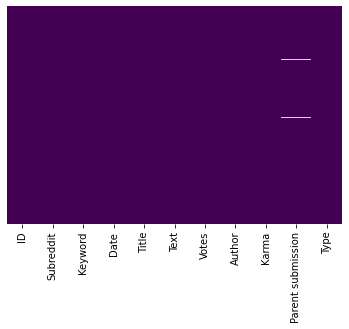

In [8]:
# Visually check for any missing / null values
sns.heatmap(tm_data_df.isnull(),xticklabels=True,yticklabels=False,cbar = False,cmap='viridis')

In [9]:
len(tm_data_df['Parent submission'].values),tm_data_df['Parent submission'].value_counts().sum()

(1546, 1533)

In [10]:
ps_data=tm_data_df['Parent submission'].unique()
ps_data

array(['ulel93', 'uew6ib', 'ur5m6k', 'uo18ot', 'urotbq', 'ur5st0',
       'unaus2', 'ul3drs', 'ul2w35', 'uia64y', 'urygih', 'uj5uhl',
       'ugusi2', 'ufpqj7', 'ueyapp', nan, 'upgprc', 'uo7s2y', 'uqzekm',
       'uspqbv', 'uj3bfo', 'uiebcv'], dtype=object)

In [11]:
ps_data_u = [ data for data in ps_data if not(pd.isnull(data) == True)]
len(ps_data_u),ps_data_u

(21,
 ['ulel93',
  'uew6ib',
  'ur5m6k',
  'uo18ot',
  'urotbq',
  'ur5st0',
  'unaus2',
  'ul3drs',
  'ul2w35',
  'uia64y',
  'urygih',
  'uj5uhl',
  'ugusi2',
  'ufpqj7',
  'ueyapp',
  'upgprc',
  'uo7s2y',
  'uqzekm',
  'uspqbv',
  'uj3bfo',
  'uiebcv'])

In [12]:
id_data =tm_data_df['ID'].unique()
len(id_data)

1546

In [13]:
count = 0
for data in ps_data_u:
  if data in id_data :
    print(f'{count+1}) {data} : This Parent submission id detail is present in ID column')
    count += 1
diff = len(ps_data_u) - count
print(f'\n{diff} Parent submission id details are NOT part of ID column')

1) ulel93 : This Parent submission id detail is present in ID column
2) uew6ib : This Parent submission id detail is present in ID column
3) ur5m6k : This Parent submission id detail is present in ID column
4) uo18ot : This Parent submission id detail is present in ID column
5) urotbq : This Parent submission id detail is present in ID column
6) ur5st0 : This Parent submission id detail is present in ID column
7) unaus2 : This Parent submission id detail is present in ID column
8) urygih : This Parent submission id detail is present in ID column
9) uj5uhl : This Parent submission id detail is present in ID column
10) ufpqj7 : This Parent submission id detail is present in ID column
11) ueyapp : This Parent submission id detail is present in ID column
12) uo7s2y : This Parent submission id detail is present in ID column
13) uiebcv : This Parent submission id detail is present in ID column

8 Parent submission id details are NOT part of ID column


In [14]:
tm_data_df['Type'].unique()

array(['comment', 'submission'], dtype=object)

In [15]:
tm_data_df['Type'].value_counts()

comment       1533
submission      13
Name: Type, dtype: int64

In [16]:
tm_data_df[tm_data_df['Type'] == 'submission']

,ID,Subreddit,Keyword,Date,Title,Text,Votes,Author,Karma,Parent submission,Type
96,unaus2,canadahousing,affordability,2022-05-11 10:16,Words have lost all meaning,A development near me in Toronto with a former...,736,LordTC,322,NaN,submission
100,urygih,canadahousing,affordability,2022-05-17 18:42,Toronto rent to sky rocket due to high gas pri...,A lot of people living outside Toronto spend t...,11,Insanely_Based,0,NaN,submission
159,ufpqj7,canadahousing,affordability,2022-04-30 22:10,My story of eviction as a disabled woman.,Apologies if I end up with word salad. I am ne...,140,Crezelle,103137,NaN,submission
371,uo7s2y,canadahousing,affordability,2022-05-12 14:33,Where to dig my roots in?,Hey everyone. I work remotely and have the cur...,7,KickStart_24,1344,NaN,submission
382,uew6ib,canadahousing,affordability,2022-04-29 17:34,Housing prices have eliminated the middle class.,Home values have essentially divided society i...,777,Mezaction,3852,NaN,submission
406,uiebcv,canadahousing,affordability,2022-05-04 15:21,Toronto lags major urban centres on new housin...,https://www.thestar.com/business/real_estate/2...,13,NIMBYsquad,853,NaN,submission
518,ur5m6k,canadahousing,affordability,2022-05-16 16:45,Why 500k is still a very expensive house,I saw a post here earlier today explaining why...,562,auriegvrd,13227,NaN,submission
594,urotbq,canadahousing,affordability,2022-05-17 11:20,This sub needs to reorganize and take action,"I, like many others in here, am frustrated, de...",585,JasonsPizza,2575,NaN,submission
794,uo18ot,canadahousing,affordability,2022-05-12 9:35,Does Toronto Planning have a Math Problem?,Keesmaat has openly admitted she didn‚Äôt know...,63,LordTC,322,NaN,submission
800,ur5st0,canadahousing,affordability,2022-05-16 16:53,How different would your life be if you housin...,Let's consider a world where the average Canad...,115,Ottawa14,641,NaN,submission


In [17]:
ps_title_all= tm_data_df['Title'].unique()
ps_title_sub= tm_data_df[tm_data_df['Type'] == 'submission']['Title'].unique()
len(ps_title_all),len(ps_title_sub)

(21, 13)

In [18]:
count = 0
for title in ps_title_all:
  if title  in ps_title_sub:
    print(f'{count+1}) submission is present in the given dataset for the title [{title}]')
    count += 1
  else:    
    print(f'->submission is NOT present in the given dataset for the title [{title}]')


diff = len(ps_title_all) - count
print(f'\nsubmissions for {diff} titles are NOT present in the given dataset\n')

1) submission is present in the given dataset for the title [Rate hike isn‚Äôt gonna do anything for Housing Affordability in the long run (unless the Feds curb institutional investing and help raise wages)]
2) submission is present in the given dataset for the title [Housing prices have eliminated the middle class.]
3) submission is present in the given dataset for the title [Why 500k is still a very expensive house]
4) submission is present in the given dataset for the title [Does Toronto Planning have a Math Problem?]
5) submission is present in the given dataset for the title [This sub needs to reorganize and take action]
6) submission is present in the given dataset for the title [How different would your life be if you housing was cheap and affordable?]
7) submission is present in the given dataset for the title [Words have lost all meaning]
->submission is NOT present in the given dataset for the title [Four Harmful Myths about Housing Affordability]
->submission is NOT present 

In [19]:
tm_data_df['Title'].nunique(),tm_data_df['Title'].unique()

(21,
 array(['Rate hike isn‚Äôt gonna do anything for Housing Affordability in the long run (unless the Feds curb institutional investing and help raise wages)',
        'Housing prices have eliminated the middle class.',
        'Why 500k is still a very expensive house',
        'Does Toronto Planning have a Math Problem?',
        'This sub needs to reorganize and take action',
        'How different would your life be if you housing was cheap and affordable?',
        'Words have lost all meaning',
        'Four Harmful Myths about Housing Affordability',
        'If housing became affordable everywhere in Canada except Toronto and Vancouver, would you consider that to be ‚Äòsolving the crisis‚Äô?',
        "CMHC finds supply 'the biggest issue affecting housing affordability'",
        'Toronto rent to sky rocket due to high gas prices.',
        "Doesn't the 5 year bond yield tell us all we need to know about housing?",
        "A story similar to my own: She moved to B.C.'s inte

In [20]:
tm_data_df['Title'].value_counts()

Why 500k is still a very expensive house                                                                                                             334
This sub needs to reorganize and take action                                                                                                         191
If housing became affordable everywhere in Canada except Toronto and Vancouver, would you consider that to be ‚Äòsolving the crisis‚Äô?              169
How different would your life be if you housing was cheap and affordable?                                                                            133
Words have lost all meaning                                                                                                                          123
Rate hike isn‚Äôt gonna do anything for Housing Affordability in the long run (unless the Feds curb institutional investing and help raise wages)     87
large scale walkout for housing reform                                            

In [21]:
tm_data_df[tm_data_df['Title'] == 'Why 500k is still a very expensive house']['Type'].value_counts()

comment       333
submission      1
Name: Type, dtype: int64

In [22]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from wordcloud import WordCloud,STOPWORDS

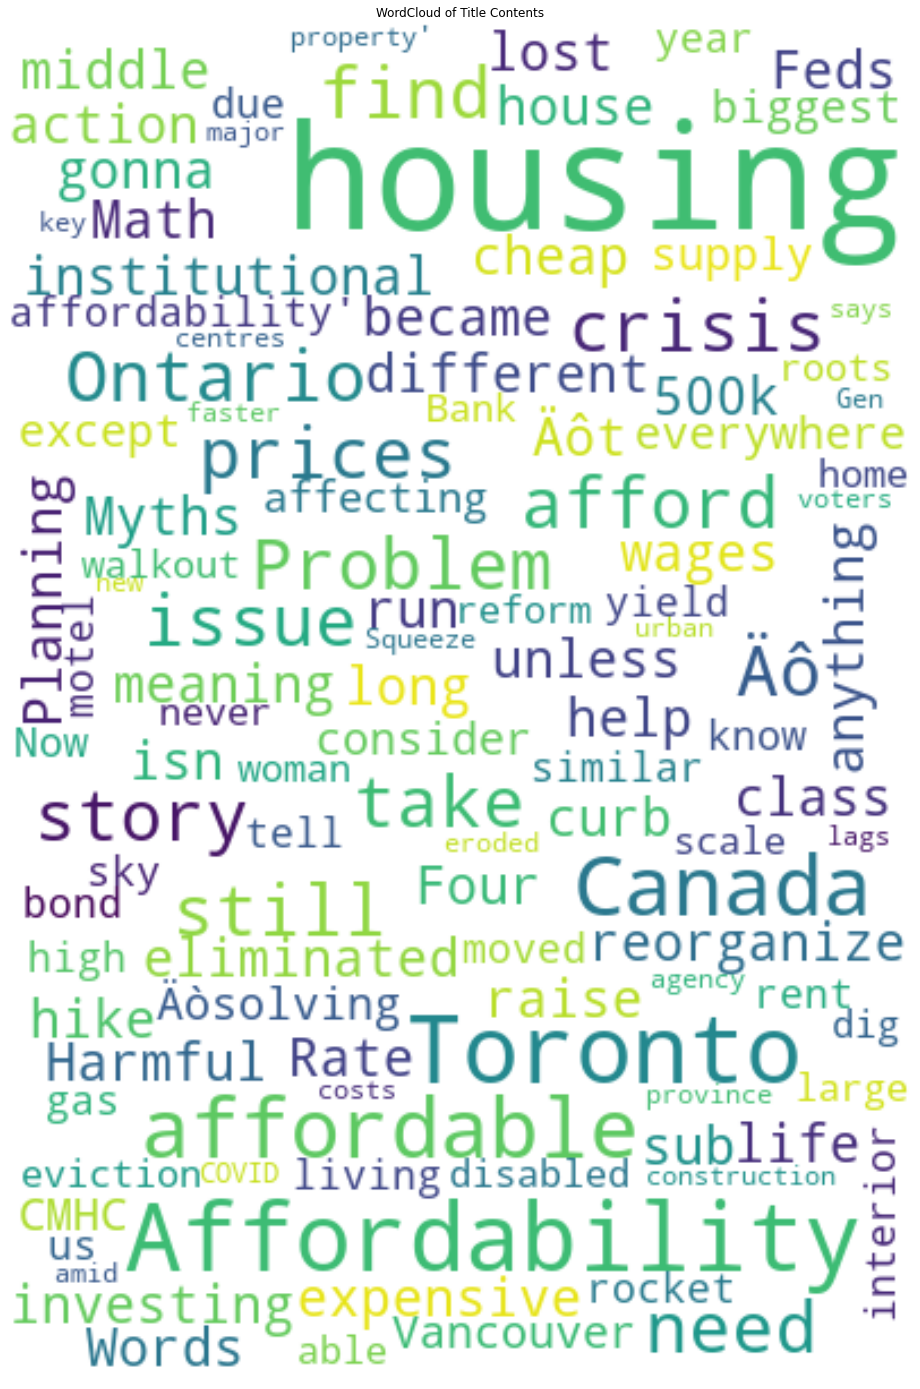

In [24]:
title_text = tm_data_df['Title'].unique().tolist()
title_text = ' '.join(title_text)
stop_words = STOPWORDS
wc = WordCloud(stopwords=stop_words,background_color='white',height=600,width=400)
plt.figure(figsize=(25,25))
wc.generate(title_text)
# Save a copy to the local drive
# wc.to_file('/content/wc1.png')
plt.imshow(wc, interpolation="bilinear")
plt.title('WordCloud of Title Contents')
plt.axis("off")
plt.show()

In [25]:
tm_data_df['Text Length'] = tm_data_df['Text'].apply(lambda x : len(x))

In [26]:
round (tm_data_df['Text Length'].mean(),2),tm_data_df['Text Length'].min(),tm_data_df['Text Length'].max()

(265.05, 1, 3223)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


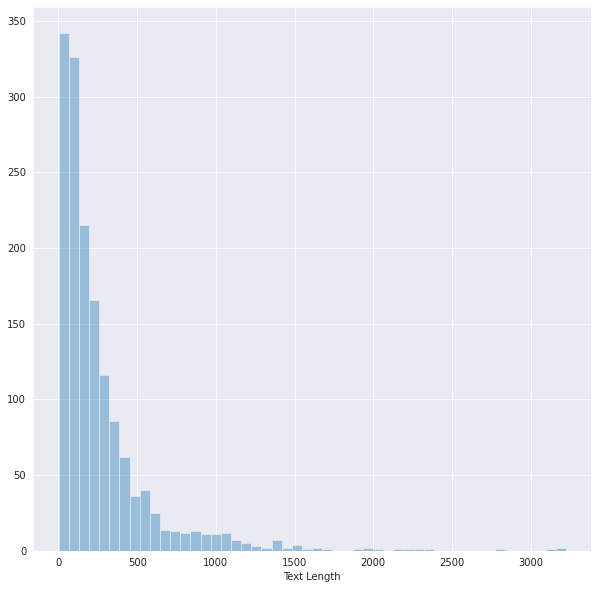

In [27]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,10))
sns.distplot(tm_data_df['Text Length'],kde=False)

In [28]:
tm_data_df['Title Length'] = tm_data_df['Title'].apply(lambda x : len(x))

In [29]:
tm_data_df['Title Length'].mean(),tm_data_df['Title Length'].min(),tm_data_df['Title Length'].max()

(63.847347994825355, 25, 145)

In [30]:
tm_data_df['Text'].iloc[1]

'\r  \n\n\n[Low rates](https://i.postimg.cc/C5bTW9fQ/Interest-Rate-vs-Ratio-of-Net-Worth-to-Wages.png) have boosted net worth far more than wages....\n\nDate | Ratio of Net Worth to Wages |Interest Rate  \nQ1 1990\t|\t5.48\t|\t12.97  \nQ2 1990\t|\t5.43\t|\t13.91  \nQ3 1990\t|\t5.49\t|\t13.07  \nQ4 1990\t|\t5.6\t|\t12.23  \nQ1 1991\t|\t5.75\t|\t10.27  \nQ2 1991\t|\t5.76\t|\t9.21  \nQ3 1991\t|\t5.84\t|\t8.81  \nQ4 1991\t|\t5.93\t|\t7.84  \nQ1 1992\t|\t6.08\t|\t7.43  \nQ2 1992\t|\t6.16\t|\t6.42  \nQ3 1992\t|\t6.29\t|\t5.43  \nQ4 1992\t|\t6.36\t|\t7.85  \nQ1 1993\t|\t6.51\t|\t6.09  \nQ2 1993\t|\t6.71\t|\t5.16  \nQ3 1993\t|\t6.82\t|\t4.74  \nQ4 1993\t|\t7.04\t|\t4.37  \nQ1 1994\t|\t7.2\t|\t4.54  \nQ2 1994\t|\t7.09\t|\t6.43  \nQ3 1994\t|\t7.23\t|\t5.73  \nQ4 1994\t|\t7.28\t|\t6.36  \nQ1 1995\t|\t7.35\t|\t8.41  \nQ2 1995\t|\t7.42\t|\t7.59  \nQ3 1995\t|\t7.46\t|\t6.72  \nQ4 1995\t|\t7.6\t|\t6.5  \nQ1 1996\t|\t7.77\t|\t5.37  \nQ2 1996\t|\t7.86\t|\t5  \nQ3 1996\t|\t7.91\t|\t4.42  \nQ4 1996\t|\t8

In [31]:
tm_data_df.iloc[888]['Text']

'my very first job out of university 12 years ago paid $52k\ni was pretty comfortable buying a 350k condo.\n\ni don‚Äôt know what the entry level job are these days, 60? 65?\n\nmaybe not on single income but for duo income, 500k is a piece of cake for any young couples'

# Data Cleaning

In [32]:
import re
import string

In [33]:
def clean_data_step(text):
  
  # Change the data to lower-case
  text = text.lower()
  # Adding the regular expressions to clean the data
  # Remove the url contents within / not within the [] and () brackets
  text = re.sub('\[https?.*?\]', '', text)
  text = re.sub('\(https?.*?\)', '', text)
  text = re.sub('https?\w*', '', text)

  # Remove all other special escape sequence patterns
  text = re.sub('\n', '', text)
  text = re.sub('\t', '', text)
  text = re.sub('\r', '', text) 
  text = re.sub('^\s{1,5000}', '', text) 
  # Remove special characters from the text  
  text = re.sub('[^\x00-\x7F]+', '', text)  
  # Remove the punctuation marks
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  # Remove the combinations of any alpha-numeric details from text
  text = re.sub('\w*\d\w*', '', text)
  return text

clean_data = lambda data: clean_data_step(data)

In [34]:
tm_text_data = pd.DataFrame(tm_data_df.Text.apply(clean_data))
tm_text_data

,Text
0,youre not supposed to catch a falling knife le...
1,low rates have boosted net worth far more than...
2,canada is a land of poor
3,work in the building supplyconstruction indust...
4,the most fertile land in the country is where...
...,...
1541,yup rezone to missing middle is pretty much w...
1542,yup i have one dog and id like a child someday...
1543,yupthis is why condos are mostly or and aren...
1544,zoning to reduce sprawl and increase multi use...


It's the dubug used code for finding regualr expressions to detect any unremoved pattern missed out during the cleaning process

In [35]:
# txt_data = list(tm_text_data['Text'])
# txt_corpus = ' '.join(txt_data)
# pattern = re.compile(r'https?.')
# pattern = re.compile(r'\(.*?\)')
# https?://(www\.)?(\w+)(\.\w+)
# pattern = re.compile(r'(\n | \r | \t)')
# pattern = re.compile(r'[‘’“”…]')
# pattern = re.compile(r'https?:?.\w*.\w*')
# pattern = re.compile(r'https?\w*')
# pattern = re.compile(r'(January | February | March | April | May | June | July | August | September | October | November | December)',re.I)
# matches = pattern.search(txt_corpus)
# print(matches)
# pattern = re.compile(r'^te')
# pattern = re.compile(r'youre')
# matches = re.finditer(pattern,txt_corpus)

# for match in matches:
#   print(match)

In [36]:
# Get the cleaned data as a list
clean_data_list = list(tm_text_data['Text'])
clean_data_list

['youre not supposed to catch a falling knife let the knife fall to the ground before you pick it up i think you proved why that analogy sucks for investing in generalwith a falling knife you now exactly when its on the ground  with investing you only know the market has stopped dropping years after the fact as any upswing could be a dead cat bounceanyone using the falling knife analogy probably doesnt have much experience with the markets',
 'low rates have boosted net worth far more than wagesdate  ratio of net worth to wages interest rate                                                                                                                                                                                                                                                                                                                                                                                             ',
 'canada is a land of poor',
 'work in the building supplyconstructio

**Remove the stop words from the cleaned text corpus**





In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus import stopwords

In [39]:
# This function has revised ouple of times to clean the text more, after seeing test results
def remove_stopwords(text):
  stops = stopwords.words("english")
  months = ['january','february','march','april','may','june', 'july','august','september','october','november','december']
  stops += months
  # More stop words( not addressed within the stops, mostly colloquial ones) have been added to the list based on the testing results  
  more_stops = ['youre','dont','doesnt','didnt','arent','city city','thats','im','isnt','yupthis','ab','ahhh','ahh','ah','l','k',
                'le','la','pa','oh','re','r','lol','ive','ah','sa','hey','ed','dt','wouldnt','id','nd','haha','havent','imo','kinda',
                'op','mp','ok','rate rate','shouldnt','thats','theyll','theyre','wasnt','werent','weve','whats','wont','yea','wow','yeah', 
                'year year','youd','youll','youve','anybody','housing housing','yes','anyways','gon','heloc','way','people people',
                'price price','year house','house house','housing year','market market']
  stops += more_stops
  words = text.split()
  refined_text = []
  for word in words:
    if word not in stops:
      refined_text.append(word)
  text = " ".join(refined_text)
  return text

final_clean_data = lambda data: remove_stopwords(data)

In [40]:
tm_text_data = pd.DataFrame(tm_text_data.Text.apply(final_clean_data))
tm_text_data

,Text
0,supposed catch falling knife let knife fall gr...
1,low rates boosted net worth far wagesdate rati...
2,canada land poor
3,work building supplyconstruction industry staf...
4,fertile land country largest percentage popula...
...,...
1541,yup rezone missing middle pretty much needed m...
1542,yup one dog like child someday even look condo...
1543,condos mostly family sized intended end usersd...
1544,zoning reduce sprawl increase multi use denser...


It is a debug code added to verify the results

In [41]:
txt_data = list(tm_text_data['Text'])
txt_corpus = ' '.join(txt_data)
pattern = re.compile(r'(January | February | March | April | May | June | July | August | September | October | November | December)',re.I)
matches = re.finditer(pattern,txt_corpus)

for match in matches:
  print(match)

In [42]:
# ATTENTION !!! USE THIS DATA AS THE INPUT FOR THE FUTURE APPROACHES
final_data_backup = list(tm_text_data['Text'])
final_data_backup = [data for data in final_data_backup if len(data) > 5]
len(final_data_backup)

1508

**Additional data cleaning step taken for the TF_IDF Model optimization after initial round of testing**

In [43]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# print(nltk.__version__)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [44]:
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

In [45]:
# JJR | Adjective, comparative |
# JJS | Adjective, superlative |
# NN | Noun, singular or mass |
# NNS | Noun, plural |
# NNP | Proper noun, singular |
# NNPS | Proper noun, plural |

def extract_noun_adj(text):
      
  # Based the test results, I have opted to use the Nouns only but not chnaging the function name
  # is_noun_adj = lambda pos: (pos[:2] == 'NN' or pos[:2] == 'JJ')
  is_noun_adj = lambda pos: (pos[:2] == 'NN')
  tokenized = word_tokenize(text)
  all_nouns_adj = [wnl.lemmatize(word) for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
  return ' '.join(all_nouns_adj)

In [46]:
tm_text_data

,Text
0,supposed catch falling knife let knife fall gr...
1,low rates boosted net worth far wagesdate rati...
2,canada land poor
3,work building supplyconstruction industry staf...
4,fertile land country largest percentage popula...
...,...
1541,yup rezone missing middle pretty much needed m...
1542,yup one dog like child someday even look condo...
1543,condos mostly family sized intended end usersd...
1544,zoning reduce sprawl increase multi use denser...


In [47]:
tm_data_tf_idf = pd.DataFrame(tm_text_data.Text.apply(extract_noun_adj))
tm_data_tf_idf

,Text
0,catch ground pick analogy suck generalwith kni...
1,rate worth worth wage interest rate
2,canada land
3,work supplyconstruction industry staff time pi...
4,land country percentage population there belt ...
...,...
1541,rezone municipality nimby
1542,dog child mention fee month
1543,condo family end usersdevelopers market invest...
1544,increase multi denser development part supply ...


In [48]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(tm_data_tf_idf.Text)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
test_series = pd.Series(data_dtm.sum(axis=0))
# Find the most frequenet occured top 250 words from the cleaned text corpus
top_100_corpus_words = ' '.join(test_series.sort_values(ascending=False).head(250).index)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [49]:
top_100_corpus_words

'people housing home price house year city market rate time money income rent cost place work mortgage thing tax job family month toronto issue life lot canada number supply kid problem country point day inflation person condo government change unit afford value property wage policy growth crisis post land area development landlord developer pay investor vancouver child hour need increase worker population building example protest reason parent think affordability food care payment support world community idea town business group class buy clothes equity situation demand bank ontario dollar car help term fact end bond solution gain owner bc today asset apartment yield renter project week mean plan grocery sense construction comment insurance rule canadian budget estate sub decade law friend party question investment kind case look council impact cause buyer economy power gas wealth profit saving factor build talk level control option course let generation start hike expense rental real

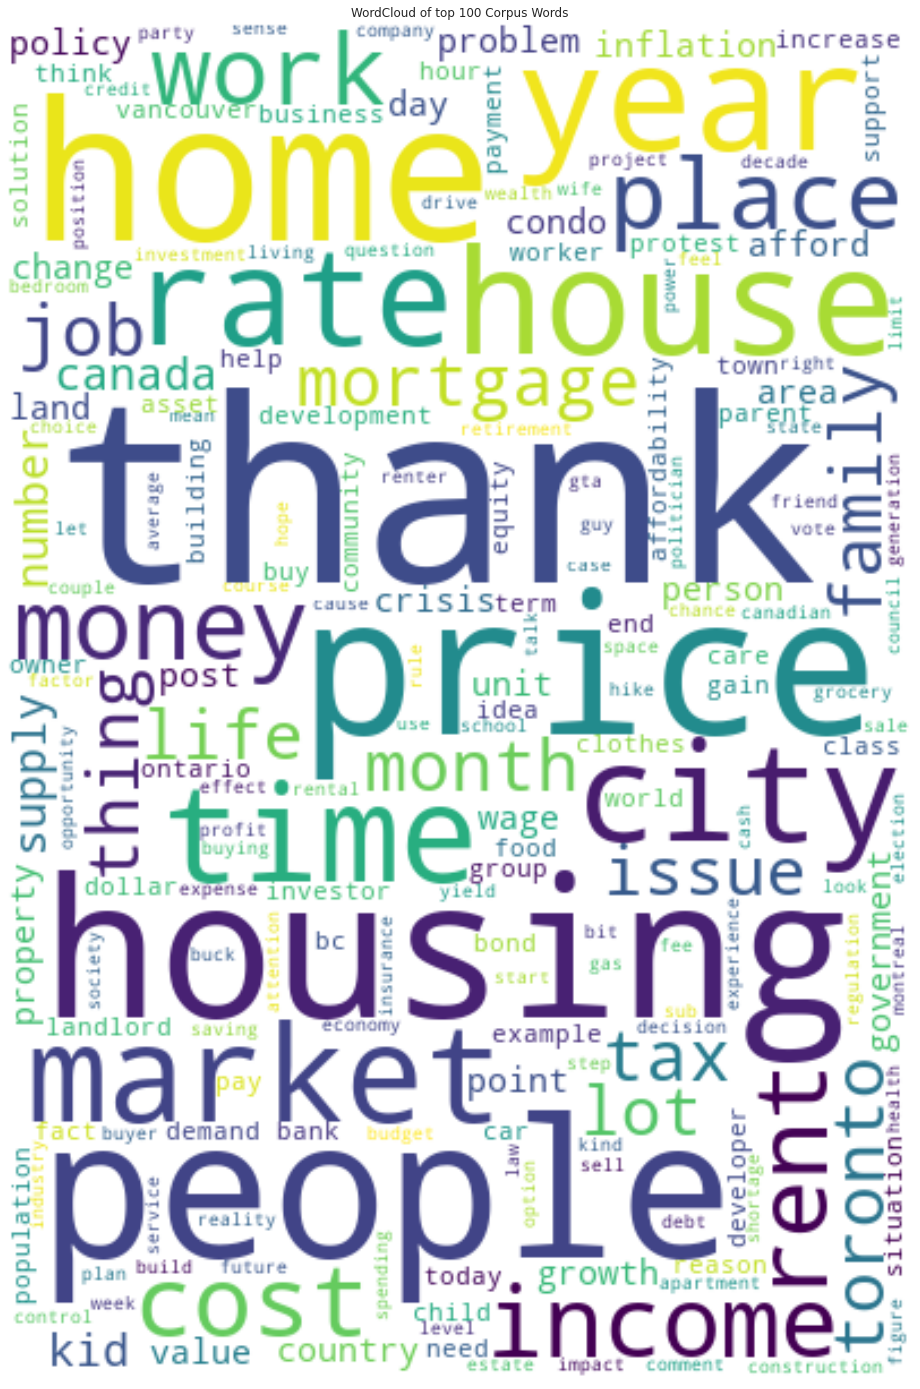

In [50]:
plt.figure(figsize=(25,25))
wc.generate(top_100_corpus_words)
# Save a copy to the local drive
# wc.to_file('/content/wc2.png')
plt.imshow(wc, interpolation="bilinear")
plt.title('WordCloud of top 100 Corpus Words')
plt.axis("off")
plt.show()

In [51]:
# Keep it for future
import pickle
tm_data_tf_idf.to_pickle('tfidf_cleaned_data_final.pkl')
tfidf_final_data = list(tm_data_tf_idf['Text'])
# Consider texts with more than 4 words for final analysis
tfidf_final_data = [data for data in tfidf_final_data if len(data) > 4]
len(tfidf_final_data)

1451

# **Approach 1**

# :By using TF-IDF with KMeans Clustering

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [53]:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
# max_df - ignore terms that have a document frequency strictly higher than the given threshold
# min_df - ignore terms that have a document frequency strictly lower than the given threshold. 
# max_features - build a vocabulary that only consider the top max_features ordered by term frequency across the corpus.
# max_features = None, 100,150,200,max_df = 0.5,0.6,0.7 
vectorizer = TfidfVectorizer(lowercase=True,max_features=None, max_df=0.5,min_df=5,ngram_range = (1,3), stop_words = "english")

In [54]:
# Create the tfid vectors for all the statements
tfidfvectors_matrix = vectorizer.fit_transform(tfidf_final_data)

It is a debug code added for verification

In [55]:
# feature_names = vectorizer.get_feature_names_out()
# # print(feature_names)
# print(f'Number of max_features : {len(feature_names)}')
# # Get a  dense matrix representation of tfidvector matrix
# tfid_dense = tfidvectors.todense()
# # Change to the list format
# tfid_denselist = tfid_dense.tolist()

# all_keywords = []

# for description in tfid_denselist:
#     idx=0
#     keywords = []
#     for word in description:
#         if word > 0:
#             keywords.append(feature_names[idx])
#         idx += 1 
#     all_keywords.append(keywords)
    
# print (tfidf_final_data[15])
# print (all_keywords[15])

**Cluster the data with clustering Algorithm - KMeans**

Use the Elbow Method to find the optimal cluster Count

[1371.1434439257712, 1354.7380780501544, 1341.934250660488, 1329.9073472187488, 1320.043054595845, 1311.8770005829524, 1301.9941936719188, 1297.7676763744103, 1283.1146891776134]


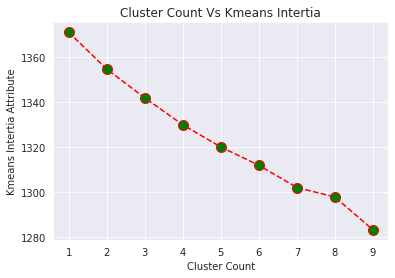

In [56]:
inertia_data = []
for k in range(1,10):
    model = KMeans(n_clusters=k)
    model.fit(tfidfvectors_matrix)
    inertia_data.append(model.inertia_)
    
print(inertia_data)
plt.plot(range(1,10),inertia_data,c='red',ls='dashed',marker='o',markerfacecolor='green',markersize=10)
plt.xlabel('Cluster Count')
plt.ylabel('Kmeans Intertia Attribute')
plt.title('Cluster Count Vs Kmeans Intertia')
plt.show()

In [57]:
# based on the test trials, 3 <-> 4 makes meaningful clusters   
num_clusters = 3
km_model = KMeans(n_clusters=num_clusters, init="k-means++")
km_model.fit(tfidfvectors_matrix)
# Get the index values feature index values sorted
cluster_centroids = km_model.cluster_centers_.argsort()[:, ::-1]
features = vectorizer.get_feature_names_out()
len(features)  

582

In [58]:
# # data_path = os.path.join(os.getcwd()) - /content - google colab directory path
# # Store the test results locally for analysis
with open ("/content/results.txt", "w+", encoding="utf-8") as f:
  data_dict = {}

  for i in range(num_clusters):
    f.write(f"Cluster:{i+1}")
    f.write("\n")    
    for ind in cluster_centroids[i, :15]:
      # Capture the data for the word cloud also
      if i not in data_dict:
        data_dict[i] = []
      data_dict[i].append(features[ind])      
      f.write (' %s' % features[ind],)
      f.write("\n")
    f.write("\n")
    f.write("\n")  

In [59]:
with open ("/content/results.txt", "r", encoding="utf-8") as f:
  print(f.read())  

Cluster:1
 time
 money
 toronto
 income
 work
 thing
 rent
 tax
 kid
 protest
 canada
 job
 point
 family
 lot


Cluster:2
 house
 price
 year
 home
 rate
 mortgage
 market
 people
 house price
 month
 rent
 afford
 payment
 cost
 equity


Cluster:3
 people
 housing
 city
 crisis
 market
 home
 year
 job
 income
 issue
 toronto
 housing crisis
 price
 place
 vancouver





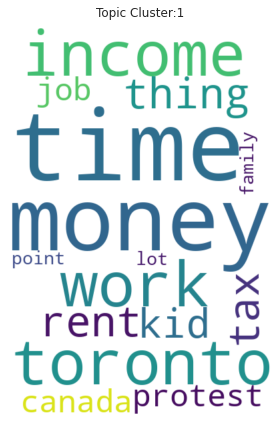

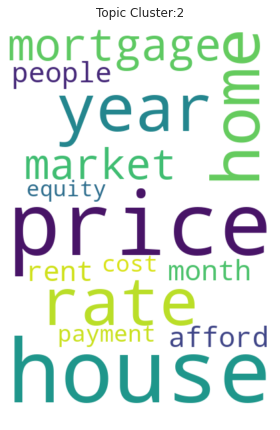

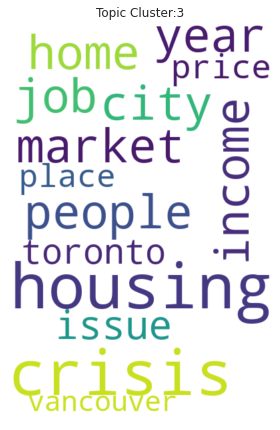

In [60]:
word_df = pd.DataFrame(data_dict)
# word_df[0].tolist()
for cluster in word_df.columns:
  plt.figure(figsize=(25,25))
  wc.generate(' '.join(word_df[cluster].tolist()))
  # Display everything in one column
  plt.subplot(len(word_df.columns),1, cluster+1)
  # plt.subplot(1,cluster+1, cluster+1)
  plt.imshow(wc, interpolation="bilinear")  
  plt.axis("off")
  name = 'Topic Cluster' + ':' + str(cluster + 1)
  plt.title(name)
    
plt.show()

**Visualization of Clusters**

In [62]:
from sklearn.decomposition import PCA

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


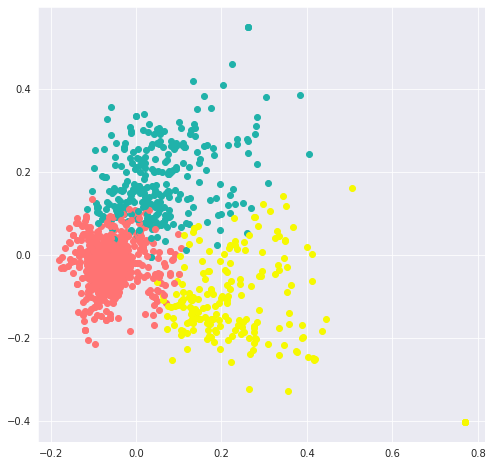

In [63]:
cluster_labels = km_model.fit_predict(tfidfvectors_matrix)
tfidf_data = tfidfvectors_matrix.todense()
# Apply the dimension reductionality technique for ploting purpose
pca = PCA(n_components= 2)
pca_data = pca.fit_transform(tfidf_data)
# labels_colors = ['b','g','r','c','m','y','k']
label_colors = {
    0: '#20b2aa', 1: '#ff7373', 2: '#f6f900', 3: '#005073', 4: '#4d0404',
    5: '#ccc0ba', 6: '#4700f9', 7: '#ffe4e1', 8: '#00f91d', 9: '#da8c49'
}

fig, ax = plt.subplots(figsize=(8,8))
for index, instance in enumerate(pca_data):
    # print instance, index, labels[index]
    pca_comp_1, pca_comp_2 = pca_data[index]
    color = label_colors[cluster_labels[index]]
    ax.scatter(pca_comp_1, pca_comp_2, c=color)
  
plt.show()

In [67]:
# It is a debug code added
# print(f'{pca.explained_variance_ratio_}')
# pca1 = PCA()
# pca1.fit(tfidf_data)
# cumsum = np.cumsum(pca1.explained_variance_ratio_)
# np.argmax(cumsum >= 0.95) + 1

# **Approach 2**

# By using the LDA (Latest Dirichelt Allocation) Method

In [68]:
!pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import spacy

In [70]:
!python -m spacy download en_core_web_md 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 96.4 MB 1.4 MB/s 
  Created wheel for en-core-web-md: filename=en_core_web_md-2.2.5-py3-none-any.whl size=98051301 sha256=74029ceae29e0e1f24b48962781944b882e513b50e737824e6233a21e4247755
  Stored in directory: /tmp/pip-ephem-wheel-cache-lp9r9m_i/wheels/69/c5/b8/4f1c029d89238734311b3269762ab2ee325a42da2ce8edb997
Successfully built en-core-web-md
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_md')


In [71]:
# Interestingly this fails at times !!! ..but the below commands do work !!
# import warnings
# warnings.filterwarnings("ignore", category=DeprecationWarning)
# nlp = spacy.load('en_core_web_md')
# nlp = spacy.load('en_core_web_md', disable=['parser', 'ner'])

In [72]:
import en_core_web_md
# nlp = en_core_web_md.load()
nlp = en_core_web_md.load(disable=['parser', 'ner'])

In [73]:
# !pip install --upgrade gensim
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [74]:
# !pip install --upgrade pyldavis
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 14.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=c791e664e184108f4903c4cd96a4ae626e530c2cf6c92ebcb1046d59b5f319a9
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyldavis


In [75]:
# For the topic modelling with LDA
import gensim
from gensim import corpora

In [76]:
# For the LDA visualization
import pyLDAvis
# import pyLDAvis.gensim
import pyLDAvis.gensim_models

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [77]:
# Identify the lemmas for Noun, Pronoun and Adjective from the corpus
# def lemmatize_data(text_corpus,pos_tags=['NOUN','PROPN','ADJ']):
# Based on the results during testing, I have opted to extract only nouns
def lemmatize_data(text_corpus,pos_tags=['NOUN','PROPN']):
  output = []  
  for sentence in text_corpus:
    # Create a doc object
    doc = nlp(sentence)
    # Work around the token attributes - lemma_ and pos_
    output.append([token.lemma_ for token in doc if token.pos_ in pos_tags ])
  return output
# lemmatize_clean_data = lambda data: lemmatization(data)

In [78]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
# Take the data  which is already cleaned 
lda_text_list = final_data_backup
lda_text_tokenized = lemmatize_data(lda_text_list)

In [79]:
# https://radimrehurek.com/gensim/models/ldamodel.html
# prepare the data for the LDA model
corp_dict = corpora.Dictionary(lda_text_tokenized)
document_term_matrix = [corp_dict.doc2bow(data) for data in lda_text_tokenized]

In [80]:
# Create an object for LDA the model
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=document_term_matrix, id2word=corp_dict, num_topics=10, random_state=100,
                chunksize=1000, passes=50,iterations=100)

In [81]:
lda_model.print_topics()

[(0,
  '0.059*"people" + 0.017*"child" + 0.017*"time" + 0.016*"housing" + 0.016*"family" + 0.015*"change" + 0.015*"year" + 0.014*"protest" + 0.011*"sub" + 0.011*"group"'),
 (1,
  '0.053*"people" + 0.046*"housing" + 0.033*"price" + 0.022*"home" + 0.020*"market" + 0.020*"city" + 0.013*"time" + 0.012*"house" + 0.012*"lot" + 0.011*"inflation"'),
 (2,
  '0.050*"toronto" + 0.044*"city" + 0.017*"crisis" + 0.017*"people" + 0.013*"downtown" + 0.013*"vancouver" + 0.013*"developer" + 0.010*"saving" + 0.009*"housing" + 0.008*"canada"'),
 (3,
  '0.039*"rate" + 0.023*"price" + 0.021*"supply" + 0.018*"home" + 0.013*"land" + 0.013*"condo" + 0.012*"cost" + 0.012*"housing" + 0.012*"market" + 0.011*"interest"'),
 (4,
  '0.033*"mortgage" + 0.032*"rate" + 0.030*"year" + 0.025*"income" + 0.020*"interest" + 0.015*"month" + 0.013*"vancouver" + 0.013*"toronto" + 0.012*"price" + 0.011*"housing"'),
 (5,
  '0.023*"rent" + 0.020*"market" + 0.020*"country" + 0.015*"tax" + 0.015*"landlord" + 0.012*"unit" + 0.010*"ra

**Visulize the Topic Clusters**

In [82]:
# https://pyldavis.readthedocs.io/en/latest/readme.html
pyLDAvis.enable_notebook()
visualize_tc = pyLDAvis.gensim_models.prepare(lda_model, document_term_matrix, corp_dict)
visualize_tc

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.000023  0.102223       1        1  23.170904
3     -0.064518  0.137834       2        1  10.672828
0      0.065940 -0.094444       3        1  10.383066
9      0.034580 -0.121031       4        1   9.961322
7     -0.095371 -0.013373       5        1   9.590900
4     -0.181787 -0.020973       6        1   8.573614
8      0.117148  0.117402       7        1   8.352398
5     -0.055741 -0.001572       8        1   7.181746
2      0.146283  0.034851       9        1   6.567643
6      0.033489 -0.140918      10        1   5.545579, topic_info=        Term        Freq       Total Category  logprob  loglift
41      city  182.000000  182.000000  Default  30.0000  30.0000
15      rate  136.000000  136.000000  Default  29.0000  29.0000
173  toronto  140.000000  140.000000  Default  28.0000  28.0000
113   people  402.000000  402.000000  Default  27.0000  27.0000
193    house  184.000000  184.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
197    thing    5.656641   70.360142  Topic10  -5.0740   0.3714
193    house    6.237455  184.362435  Topic10  -4.9763  -0.4942
124   worker    4.683689   37.853018  Topic10  -5.2628   0.8025
836  protest    4.603178   40.061628  Topic10  -5.2801   0.7285
15      rate    5.066306  136.312769  Topic10  -5.1843  -0.4002

[661 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
242       7  0.748477  account
1484      3  0.700096   action
1484      7  0.262536   action
1268      5  0.146084  address
1268      9  0.730418  address
...     ...       ...      ...
1079      4  0.972775    yield
2336      9  0.772189   yimbys
3018      6  0.718415    yonge
3018      7  0.119736    yonge
1180      9  0.629648       yr

[1176 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 10, 8, 5, 9, 6, 3, 7])

**LDA Model Evaluation**

In [83]:
# https://radimrehurek.com/gensim/models/coherencemodel.html
from gensim.models.coherencemodel import CoherenceModel

In [84]:
coherence = CoherenceModel(model=lda_model, texts=lda_text_tokenized, dictionary=corp_dict, coherence='c_v')
coherence_score = coherence.get_coherence()
print('\nCoherence Score: ', coherence_score)
# print('\nPerplexity: ', lda_model.log_perplexity(document_term_matrix,total_docs=1000))


Coherence Score:  0.4208031557457284


**Model Optimization**

In [85]:
def compute_coherence_values(corpus,dictionary_data,lda_text,min_topic,max_topic):
  # Create an object for LDA the model
  LDA = gensim.models.ldamodel.LdaModel
  model_coherence_values = []
  lda_model_list = []
  for num_topics in range(min_topic, max_topic + 1):    
    # Build LDA model
    lda_model = LDA(corpus=corpus, id2word=dictionary_data, num_topics=num_topics, random_state=100,chunksize=1000, passes=50,iterations=100)
    lda_model_list.append(lda_model)
    coherence = CoherenceModel(model=lda_model, texts=lda_text, dictionary=dictionary_data, coherence='c_v')
    # coherence_score = coherence.get_coherence()
    coherence_score = round(coherence.get_coherence(),4)
    model_coherence_values.append(coherence_score)

  return lda_model_list, model_coherence_values

Find the best model

In [86]:
lda_model_list, model_coherence_values = compute_coherence_values(document_term_matrix,corp_dict,lda_text_tokenized,1,15)

num_topics = range(1,16)
index = 0
winner_model_cv = float('-inf')
winner_model_index = 0
# Print the coherence scores
for topic_count, coherence_value in zip(num_topics, model_coherence_values):        
    print(f'lda_model_list[index]:{index} with Number of Topics = {topic_count} has Coherence Value of {coherence_value}')
    if coherence_value > winner_model_cv:
      winner_model_index = index
      winner_model_cv = coherence_value

    index += 1

print(f'\nWinning model CV is : {winner_model_cv} | Number of Topics: {winner_model_index+1} | lda_model_list index : {winner_model_index}')    

lda_model_list[index]:0 with Number of Topics = 1 has Coherence Value of 0.3827
lda_model_list[index]:1 with Number of Topics = 2 has Coherence Value of 0.4203
lda_model_list[index]:2 with Number of Topics = 3 has Coherence Value of 0.4655
lda_model_list[index]:3 with Number of Topics = 4 has Coherence Value of 0.4674
lda_model_list[index]:4 with Number of Topics = 5 has Coherence Value of 0.4295
lda_model_list[index]:5 with Number of Topics = 6 has Coherence Value of 0.4134
lda_model_list[index]:6 with Number of Topics = 7 has Coherence Value of 0.4227
lda_model_list[index]:7 with Number of Topics = 8 has Coherence Value of 0.4525
lda_model_list[index]:8 with Number of Topics = 9 has Coherence Value of 0.4236
lda_model_list[index]:9 with Number of Topics = 10 has Coherence Value of 0.4208
lda_model_list[index]:10 with Number of Topics = 11 has Coherence Value of 0.4268
lda_model_list[index]:11 with Number of Topics = 12 has Coherence Value of 0.4016
lda_model_list[index]:12 with Numbe

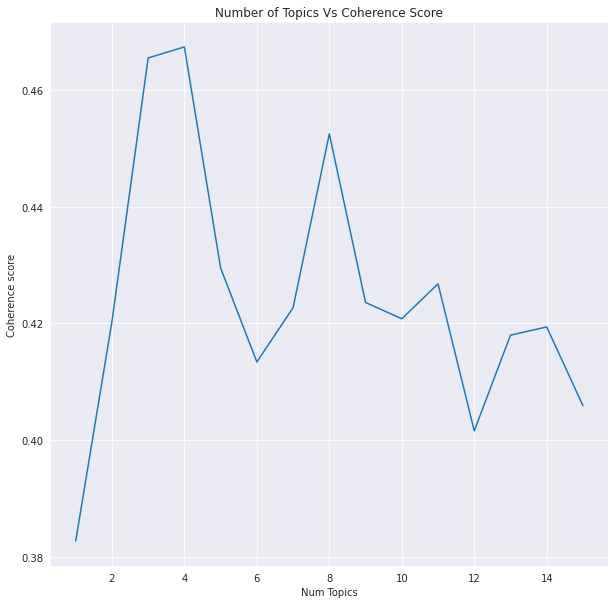

In [87]:
plt.figure(figsize=(10,10))
x = range(1, 16,1)
plt.plot(x, model_coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.title('Number of Topics Vs Coherence Score')
plt.show()

In [88]:
# Select the model and print the topics
winning_model = lda_model_list[winner_model_index]
winning_model.print_topics(num_words=15)

[(0,
  '0.030*"year" + 0.028*"people" + 0.025*"house" + 0.014*"rate" + 0.014*"time" + 0.013*"kid" + 0.011*"canada" + 0.009*"parent" + 0.009*"housing" + 0.008*"month" + 0.008*"child" + 0.007*"country" + 0.007*"protest" + 0.007*"mortgage" + 0.007*"price"'),
 (1,
  '0.036*"people" + 0.026*"housing" + 0.021*"home" + 0.019*"price" + 0.017*"market" + 0.014*"house" + 0.012*"money" + 0.010*"rent" + 0.010*"time" + 0.009*"lot" + 0.009*"rate" + 0.008*"inflation" + 0.008*"mortgage" + 0.008*"issue" + 0.008*"city"'),
 (2,
  '0.029*"city" + 0.028*"toronto" + 0.016*"people" + 0.011*"housing" + 0.010*"vancouver" + 0.007*"bond" + 0.006*"yield" + 0.006*"community" + 0.006*"crisis" + 0.005*"place" + 0.005*"post" + 0.005*"canada" + 0.005*"developer" + 0.005*"area" + 0.005*"job"'),
 (3,
  '0.020*"housing" + 0.014*"price" + 0.013*"city" + 0.012*"income" + 0.012*"development" + 0.010*"policy" + 0.008*"supply" + 0.008*"number" + 0.008*"market" + 0.007*"home" + 0.007*"rate" + 0.007*"unit" + 0.007*"developer" + 

In [89]:
pyLDAvis.enable_notebook()
visualize_tc = pyLDAvis.gensim_models.prepare(winning_model, document_term_matrix, corp_dict)
visualize_tc

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.087428 -0.075346       1        1  42.328589
0     -0.114399  0.080670       2        1  21.674520
3      0.085689 -0.107045       3        1  19.141881
2      0.116138  0.101721       4        1  16.855010, topic_info=        Term        Freq       Total Category  logprob  loglift
193    house  187.000000  187.000000  Default  30.0000  30.0000
41      city  174.000000  174.000000  Default  29.0000  29.0000
173  toronto  137.000000  137.000000  Default  28.0000  28.0000
13      year  181.000000  181.000000  Default  27.0000  27.0000
113   people  400.000000  400.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
421   supply   11.206460   65.126109   Topic4  -5.5020   0.0207
103   income   11.471434  102.602083   Topic4  -5.4787  -0.4105
779      sub    9.250647   32.536240   Topic4  -5.6938   0.5229
29       lot   10.256787   81.820395   Topic4  -5.5906  -0.2961
105     life    9.119489   59.717671   Topic4  -5.7081  -0.0987

[291 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
1268      1  0.146462        address
1268      4  0.732308        address
799       3  0.802627       advocate
799       4  0.178361       advocate
442       1  0.230156  affordability
...     ...       ...            ...
1079      4  0.937256          yield
2336      4  0.779483         yimbys
3018      3  0.925432          yonge
827       3  0.638049         zoning
827       4  0.283577         zoning

[392 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])

# **Approach 3**

# By using the Transformer based approach - with the BERTopic model

In [90]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 58 kB 4.4 MB/s 
     |████████████████████████████████| 5.2 MB 28.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 88 kB 8.6 MB/s 
     |████████████████████████████████| 79 kB 7.4 MB/s 
     |████████████████████████████████| 4.2 MB 52.3 MB/s 
     |████████████████████████████████| 1.2 MB 55.6 MB/s 
     |████████████████████████████████| 86 kB 5.7 MB/s 
     |████████████████████████████████| 636 kB 74.0 MB/s 
     |████████████████████████████████| 6.6 MB 50.6 MB/s 
     |████████████████████████████████| 1.1 MB 77.6 MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2342135 sha256=5add21c0a24c6af80cd8cda5ae529e639e31f40374997f4339460118ac78db84
  Stored in directory: /root/.cache/p

In [91]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from bertopic import BERTopic

In [92]:
# https://maartengr.github.io/BERTopic/api/bertopic.html#bertopic._bertopic.BERTopic.__init__
BERTopic_model = BERTopic(language="english",verbose=True, n_gram_range=(1,3),embedding_model="paraphrase-MiniLM-L12-v2", min_topic_size=10,  calculate_probabilities=True)

In [93]:
topics, probabilities = BERTopic_model.fit_transform(lda_text_list)

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.70k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/631 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/316 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Batches:   0%|          | 0/48 [00:00<?, ?it/s]

2022-06-03 15:52:16,921 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)
2022-06-03 15:52:28,968 - BERTopic - Reduced dimensionality
2022-06-03 15:52:29,120 - BERTopic - Clustered reduced embeddings


In [94]:
BERTopic_model.get_topic_info()[1:17]

,Topic,Count,Name
1,0,285,0_toronto_canada_housing_people
2,1,142,1_rates_interest_inflation_prices
3,2,141,2_would_kids_time_house
4,3,123,3_thank_like_sure_opinion
5,4,93,4_rent_landlords_landlord_paying
6,5,75,5_housing_council_people_vancouver
7,6,33,6_protest_protests_convoy_protesting
8,7,29,7_planning_city_profitability_development
9,8,25,8_budget_bucks_affordable_month
10,9,24,9_lunch_hour_time_walkout


In [95]:
BERTopic_model.get_topic(7)

[('planning', 0.02201171756369635),
 ('city', 0.019633744665829084),
 ('profitability', 0.017733139427352156),
 ('development', 0.01603260137703572),
 ('rules', 0.013840395167178427),
 ('housing', 0.012674942684584757),
 ('developer', 0.01230257348193638),
 ('affordable', 0.012248967263213393),
 ('like', 0.01157000471912585),
 ('understand', 0.011148022904325237)]

In [96]:
BERTopic_model.visualize_topics()

In [97]:
BERTopic_model.visualize_barchart()

In [98]:
BERTopic_model.visualize_heatmap()

In [99]:
BERTopic_model.visualize_term_rank()